In [1]:
import dask.dataframe as dd

#This imports the dataframe comprising the time series data and the labels (tool Name)
# There are 46 columns in the dataframe
# The first is the TimeStamp, Then we have 4 lists of values : Sound, Accel X, Accel Y , Accel Z
# Then we have 10 columns for each list of values : Mean, Std, Min, Max, energy, rootMean Square, skewness, kurtosis, fft_peak_amplitude, fft_peak frequency
#Finally we have the corresponding label (Tool Name) There are 55'117 lines. 


#Using kaggle, we have converted the lists (Sound, Accel, X, Accel Y, Accel Z) into .csv files of 5 seconds each with their corresponding label


DfFrameStatistics=dd.read_parquet('F:/Data_BachelorHES/DataSet_CNC/Labels_Data_Statistics.parquet', engine='pyarrow')

C:\Users\Julie\AppData\Local\Programs\Python\Python39\lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import pandas as pd
"""
This imports a dataframe with the statistics grouped by label (Tool Name). We also have "timestamps" component in the dataframe. The start and end are in ms. They represent the timeframe on which the statistics have been calculated

There are 43 columns in the dataframe.

The two first are the TimeFrame (start, end), Then we have the corresponding label 

Then we have 10 columns for each sensor : Sound, Accel X, Y, Z. 

These 10 columns represent  : Mean, Std, Min, Max, energy, rootMean Square, skewness, kurtosis, fft_peak_amplitude, fft_peak frequency
Finally we have the corresponding label (Tool Name) There are 14 lines because we have 14 tools. """

DfLabelStats=pd.read_parquet('F:/Data_BachelorHES/DataSet_CNC/StatsByLabel_Time.parquet', engine='pyarrow')

In [135]:
# 📌 Fonction pour récupérer la durée d'un fichier (audio ou vidéo)
def get_file_duration(file_path, fs):
    try:
        ext = os.path.splitext(file_path)[1]

        # For .csv files
        if ext in [".csv"]:
           with open(file_path, 'r', newline='', encoding="utf-8") as csvfile:
            raw_data = csvfile.read().replace("\r\n", "")  # Supprimer les retours à la ligne
            myReader= list(csv.reader([raw_data], delimiter=','))
            return  float(len(myReader[0])/fs) #Duration in seconds

        # Other types of files
        else:
            return None  # Pas de durée disponible

    except Exception as e:
        print(f"Error with : {file_path}: {e}")
        return None

In [136]:
#Prepare a dataframe with the list of files and their corresponding labels and the duration of each observation

import os
import csv
from pathlib import Path
import pandas as pd

# 📌 Dossier à scanner (modifie ce chemin selon ton projet)
base_dir = "F:/Data_BachelorHES/DataSet_CNC/segments/"

# 📌 Scanner les fichiers du dossier et sous-dossiers
myDirs=[]
xs=[]
ys=[]
zs=[]
snds=[]
nbs=[]
labels=[]
durs=[]
j=1
fs=50000
lastnb=None
for root, dirs, files in os.walk(base_dir):
    for file in files:
        
        measName=file.split("_")[1]
        nb=int(file.split("_")[0])
        if nb != lastnb or lastnb == None:
            file_path = Path(root) / file
            myDir=str(file_path).split('segments')[-1].split("\\")[1]
            label=myDir.split('Label_')[-1]
            durs.append(get_file_duration(file_path, fs))
            labels.append(label)
            myDirs.append(myDir)
            nbs.append(nb)
            print(j, nb, file)
            j+=1
        if measName=='sound':
            snds.append(file)
        if measName=='accX':
            xs.append(file)
        if measName=='accY':
            ys.append(file)
        if measName=='accZ':
            zs.append(file)

        lastnb=nb

del lastnb, nb, j, root, myDir, measName, file, file_path, dirs, files, label

# 📌 Créer un DataFrame avec les informations
df = pd.DataFrame({'nb':nbs, 'dir':myDirs, 'label':labels, 'sound':snds, 'accelX':xs, 'accelY':ys, 'accelZ':zs, 'duration': durs})
del labels, nbs, myDirs, snds, xs, ys, zs, durs, fs

1 759 0759_accX_label_T02 M06 (VHM 309-12).csv
2 760 0760_accX_label_T02 M06 (VHM 309-12).csv
3 761 0761_accX_label_T02 M06 (VHM 309-12).csv
4 762 0762_accX_label_T02 M06 (VHM 309-12).csv
5 763 0763_accX_label_T02 M06 (VHM 309-12).csv
6 764 0764_accX_label_T02 M06 (VHM 309-12).csv
7 765 0765_accX_label_T02 M06 (VHM 309-12).csv
8 766 0766_accX_label_T02 M06 (VHM 309-12).csv
9 767 0767_accX_label_T02 M06 (VHM 309-12).csv
10 768 0768_accX_label_T02 M06 (VHM 309-12).csv
11 769 0769_accX_label_T02 M06 (VHM 309-12).csv
12 770 0770_accX_label_T02 M06 (VHM 309-12).csv
13 771 0771_accX_label_T02 M06 (VHM 309-12).csv
14 772 0772_accX_label_T02 M06 (VHM 309-12).csv
15 773 0773_accX_label_T02 M06 (VHM 309-12).csv
16 774 0774_accX_label_T02 M06 (VHM 309-12).csv
17 775 0775_accX_label_T02 M06 (VHM 309-12).csv
18 776 0776_accX_label_T02 M06 (VHM 309-12).csv
19 777 0777_accX_label_T02 M06 (VHM 309-12).csv
20 778 0778_accX_label_T02 M06 (VHM 309-12).csv
21 779 0779_accX_label_T02 M06 (VHM 309-12).csv
2

In [ ]:
import numpy as np
print("Max duraition is : " + np.max(df['duration']))

## Look at the distribution of labels

In [117]:


df.sort_values(by='nb', inplace=True)
df["nb"] = df["nb"] - 1
df = df.set_index("nb", drop=False)
label_counts = df['label'].value_counts()

Total samples : 1843.0


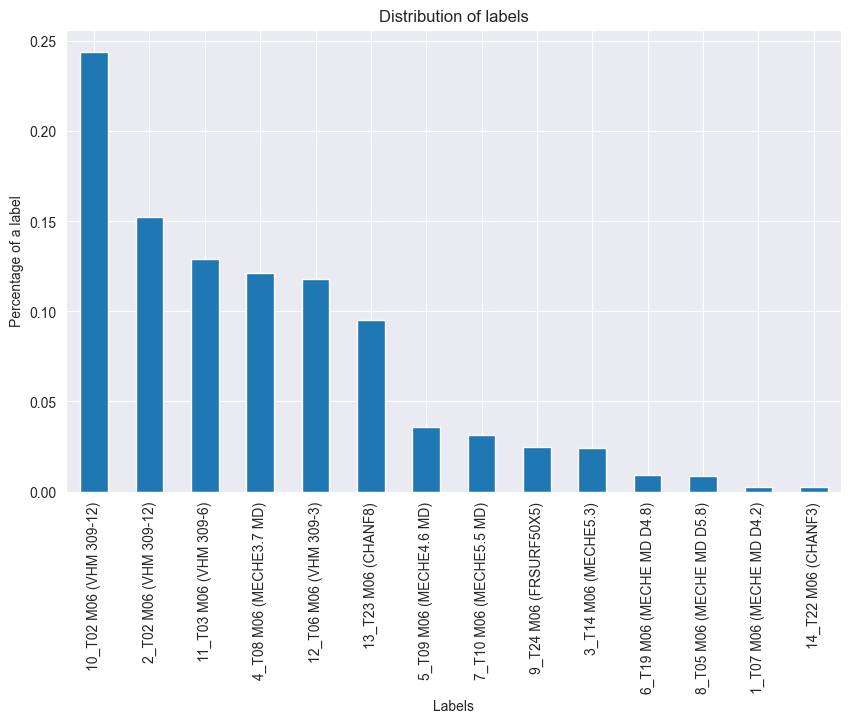

In [120]:
#Plot Labels
import matplotlib.pyplot as plt
total = label_counts.sum()
print(f"Total samples : {total}")
label_counts=label_counts/total
label_counts.sort_values(ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
label_counts.plot(kind='bar', ax=ax)
ax.set_title("Distribution of labels")
ax.set_ylabel("Percentage of a label")
ax.set_xlabel("Labels")
plt.show()
label_counts=label_counts*total
del total, ax, fig

## Look at condensed labels distribution

In [122]:
import numpy as np

newLabels=['VHM', 'CHANF', 'MECHE', 'MECHMD', 'FRSURF']
myNpArr=np.zeros(len(newLabels))
for index, row in label_counts.items():
    if 'VHM' in index:
        myNpArr[0]+=row
    if 'CHANF' in index:
        myNpArr[1]+=row
    if ('MECHE' in index) and ('MD'in index):
        myNpArr[2]+=row
    if ('MECHE' in index) and (not 'MD' in index):
        myNpArr[3]+=row
    if ('FRSURF' in index):
        myNpArr[4]+=row
mySeriesCondensedLabels=pd.Series(myNpArr, index=newLabels)
del myNpArr, newLabels, index, row
    

Nb of samples : 1843.0


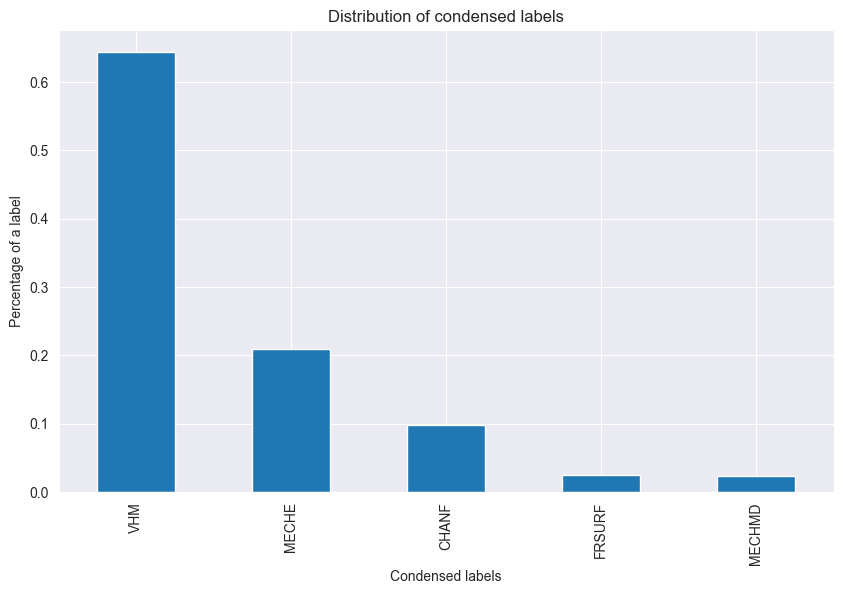

In [123]:
#Plot mySeriesCondensedLabels
import matplotlib.pyplot as plt
total=mySeriesCondensedLabels.sum()
print(f"Nb of samples : {total}")
mySeriesCondensedLabels=mySeriesCondensedLabels/total
mySeriesCondensedLabels.sort_values(ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
mySeriesCondensedLabels.plot(kind='bar', ax=ax)
ax.set_title("Distribution of condensed labels")
ax.set_ylabel("Percentage of a label")
ax.set_xlabel("Condensed labels")
plt.show()
mySeriesCondensedLabels=mySeriesCondensedLabels*total

del total, ax, fig


In [124]:
#Adding the condensed labels to the dataframe
condensedLabelLst=[]
for row in df.iterrows():
    if 'VHM' in row[1]['label']:
        condensedLabelLst.append('VHM')
    if 'CHANF' in row[1]['label']:
        condensedLabelLst.append('CHANF')
    if ('MECHE' in row[1]['label']) and ('MD'in row[1]['label']):
        condensedLabelLst.append('MECHMD')
    if ('MECHE' in row[1]['label']) and (not 'MD' in row[1]['label']):
        condensedLabelLst.append('MECHE')
    if ('FRSURF' in row[1]['label']):
        condensedLabelLst.append('FRSURF')
df=pd.concat([df, pd.DataFrame({'condensedLabel':condensedLabelLst})], axis=1)
del condensedLabelLst, row

## Preparing the data for the ML pipeline with Sratified Shuffle Split

In [129]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
X=df[['sound', 'accelX', 'accelY', 'accelZ']]
Y=df['label']

trainSerie=pd.Series(np.nan, index=list(Y.unique()))
trainDf=pd.DataFrame(trainSerie , columns=['Init'])
testDf=pd.DataFrame(trainSerie , columns=['Init'])
del trainSerie

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
foldData=[]
for i, (train_index, test_index) in enumerate(sss.split(X,Y)):
    foldData.append((train_index, test_index))
    print(f"Fold {i} : {len(train_index)} training samples, {len(test_index)} testing samples")
    classTrain=Y[train_index].value_counts()
    classTrain=classTrain/len(train_index)
    trainDf[f"Fold {i}" ]=classTrain

    classTest=Y[test_index].value_counts()
    classTest=classTest/len(test_index)
    testDf[f"Fold {i}" ]=classTest

trainDf.drop(columns='Init', inplace=True)
testDf.drop(columns='Init', inplace=True)
del classTrain, classTest, i, train_index, test_index, sss, StratifiedShuffleSplit, Y

Fold 0 : 1474 training samples, 369 testing samples
Fold 1 : 1474 training samples, 369 testing samples
Fold 2 : 1474 training samples, 369 testing samples
Fold 3 : 1474 training samples, 369 testing samples
Fold 4 : 1474 training samples, 369 testing samples


In [130]:
labels=[]
for label in list(testDf.index):
    labels.append(int(label.split("_")[0]))
testDf['Label']=labels

labels=[]
for label in list(trainDf.index):
    labels.append(int(label.split("_")[0]))
trainDf['Label']=labels

labels=[]
for label in list(label_counts.index):
    labels.append(int(label.split("_")[0]))
labelsCount=pd.DataFrame(label_counts)
labelsCount['Label']=labels
del labels, label

Total samples : 1843.0
Total samples : 1843.0
Total samples : 1843.0
Total samples : 1843.0
Total samples : 1843.0


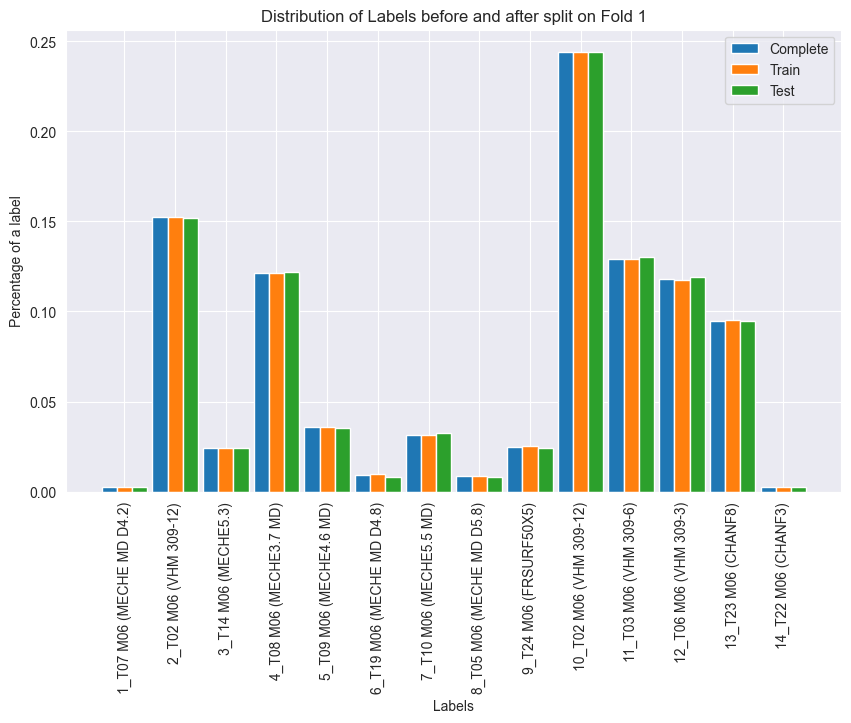

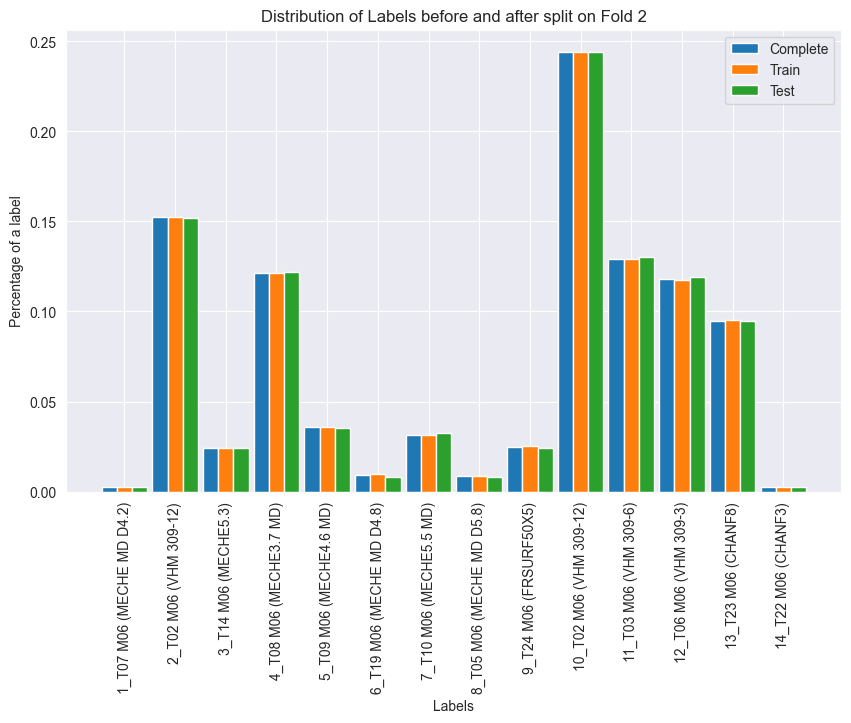

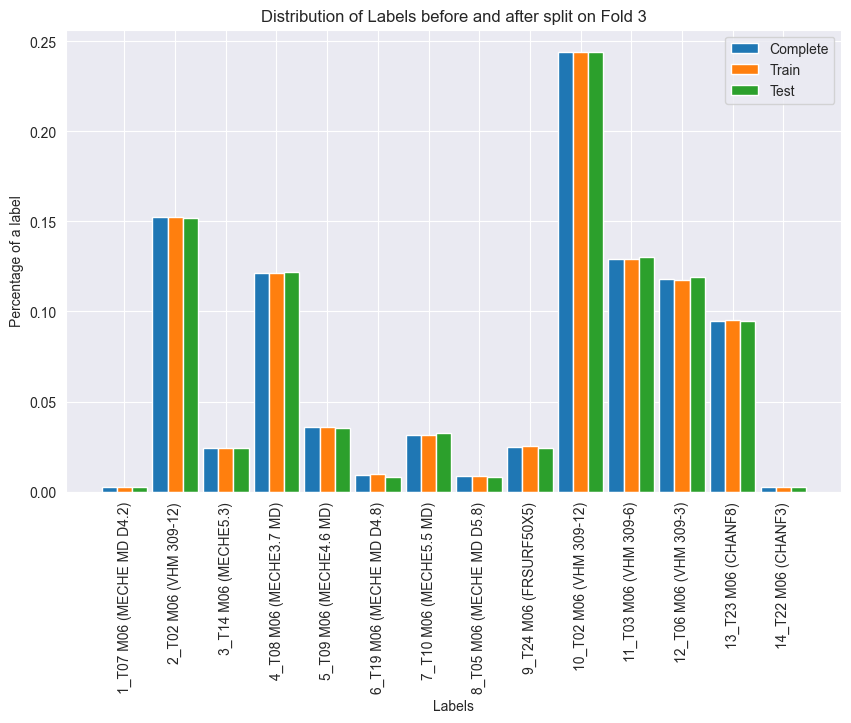

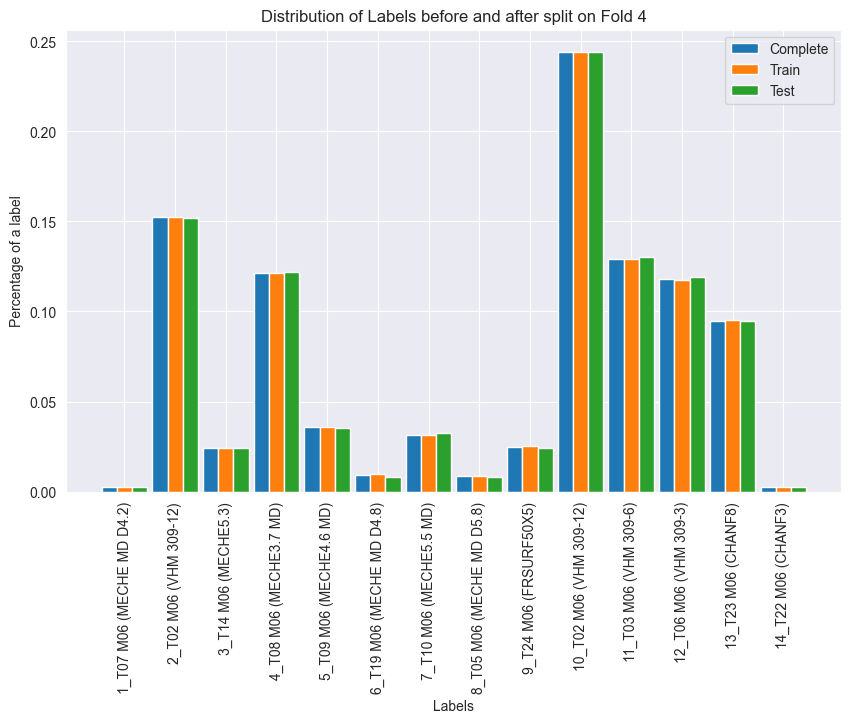

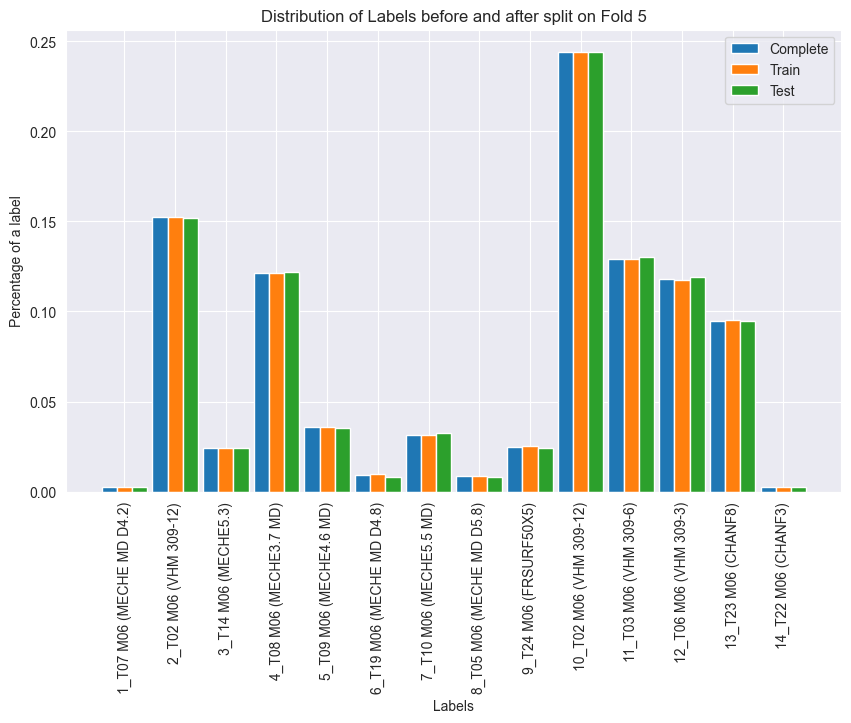

In [131]:
#Prepare a plot of distribution of data in each fold
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib as mpl

for i in range(0,5):
    labels=[]
    for label in list(label_counts.index):
        labels.append(int(label.split("_")[0]))
    labelsCount=pd.DataFrame(label_counts)
    labelsCount['Label']=labels
    total = labelsCount['count'].sum()
    print(f"Total samples : {total}")
    labelsCount['count']=labelsCount['count']/total
    
    labelsCount.sort_values(ascending=True, inplace=True, by='Label')
    testDf.sort_values(ascending=True, inplace=True, by='Label')
    trainDf.sort_values(ascending=True, inplace=True, by='Label')
    X=list(testDf.index)
    X_axis = np.arange(len(X)) # the label locations
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.bar(X_axis - 0.3, labelsCount['count'], width=0.3, label = 'Complete', ) 
    plt.bar(X_axis , trainDf[f"Fold {i}"], width=0.3, label = 'Train') 
    plt.bar(X_axis + 0.3, testDf[f"Fold {i}"], width=0.3, label = 'Test') 
    
    #trainDf["Fold 0"].plot(kind='bar', ax=ax)
    #testDf["Fold 0"].plot(kind='bar', ax=ax)
    
    plt.xticks(X_axis, trainDf.index, rotation=90) 
    ax.set_title(f"Distribution of Labels before and after split on Fold {i+1}")
    ax.set_ylabel("Percentage of a label")
    ax.set_xlabel("Labels")
    ax.legend()

plt.show()
del label, labels, labelsCount,i, X_axis, X, total, ax, fig, colormaps

Fold 0 : 1474 training samples, 369 testing samples
Fold 1 : 1474 training samples, 369 testing samples
Fold 2 : 1474 training samples, 369 testing samples
Fold 3 : 1474 training samples, 369 testing samples
Fold 4 : 1474 training samples, 369 testing samples


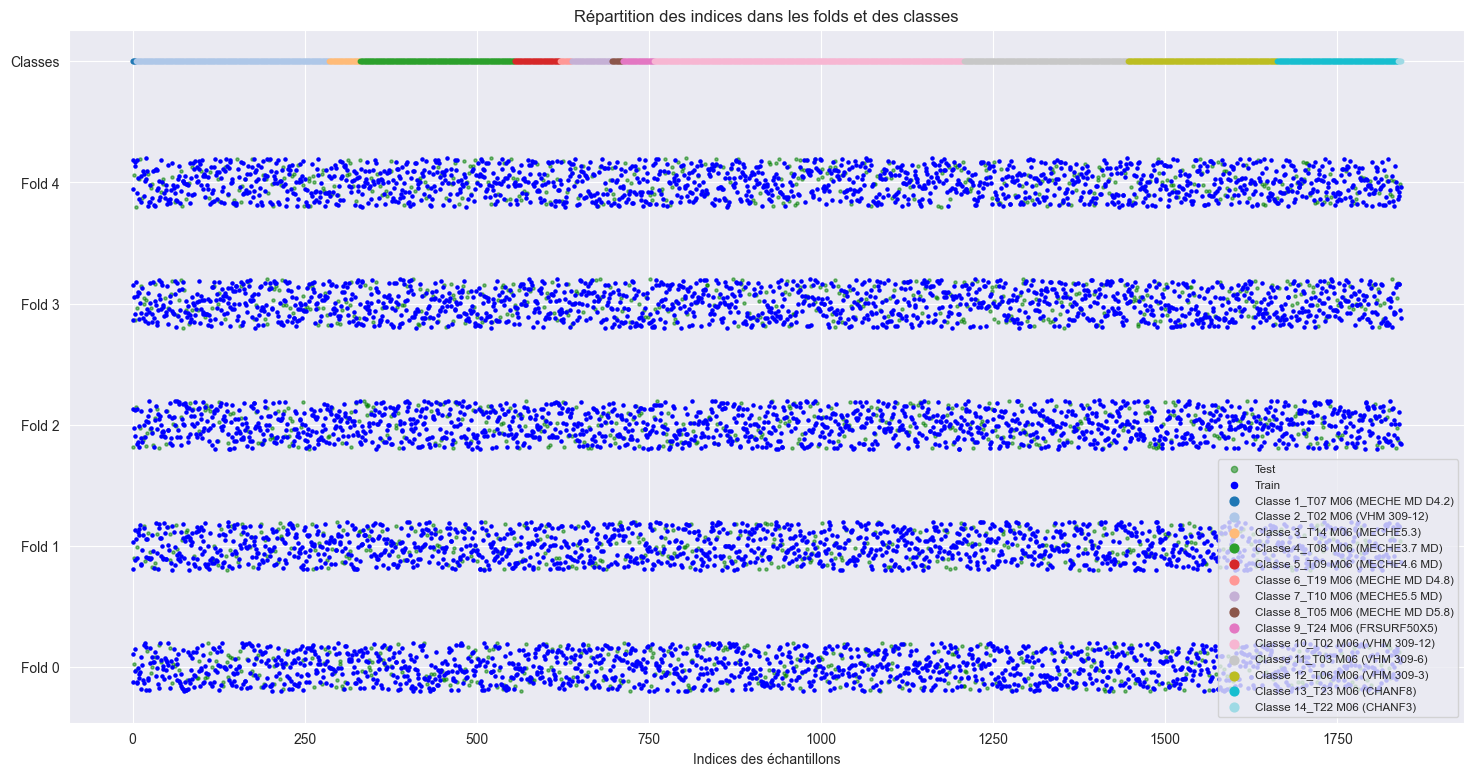

In [132]:
#Prepare a plot of distribution of data in each fold
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib as mpl

# Création de la figure
fig, ax = plt.subplots(figsize=(18, 9))
# Labels des classes
Y=df['label']
labels=Y.unique()
# Nombre de folds + 1 pour la barre des classes
nbFolds = len(foldData) + 1

# Création des barres pour chaque fold
for i, (train_index, test_index) in enumerate(foldData):
    print(f"Fold {i} : {len(train_index)} training samples, {len(test_index)} testing samples")
    y_train = np.full(len(train_index), i) + np.random.uniform(-0.2, 0.2, len(train_index)) # Position des barres train
    y_test = np.full(len(test_index), i) + np.random.uniform(-0.2, 0.2, len(test_index)) # Position des barres test
    ax.scatter(test_index, y_test, color="green", s=5, alpha=0.5, label="Test" if i == 0 else "")
    ax.scatter(train_index, y_train, color="blue", s=5, label="Train" if i == 0 else "")

# Ajout de la dernière barre pour la distribution des classes
y_classes = np.full(len(Y), nbFolds - 1)  # Dernière ligne pour les classes

# Attribution d'une couleur par classe
tab20 = mpl.colormaps['tab20'].resampled(len(labels))
class_colors = {label: tab20.colors[i] for i, label in enumerate(labels)}

for label in labels:
    indices = np.where(Y == label)[0]
    y_classes = np.full(len(indices), nbFolds - 1) 
    ax.scatter(indices, y_classes, color=class_colors[label], s=10, label=f"Class {label}")

# Configuration de l'axe
ax.set_yticks(range(nbFolds))
ax.set_yticklabels([f"Fold {i}" for i in range(len(foldData))] + ["Classes"])
ax.set_xlabel("Samples' indices")
ax.set_title("Repartition of indices in folds and classes")
ax.legend(loc="lower right", markerscale=2, fontsize="small")

# Afficher la visualisation
plt.show()

del fig, ax, Y, nbFolds,  i, train_index, test_index, y_train, y_test, y_classes,  tab20, class_colors, indices, label, labels, colormaps

In [14]:
import os
import shutil
from tqdm import tqdm

srcDir="F:/Data_BachelorHES/DataSet_CNC/segments/"
destDir="F:/Data_BachelorHES/DataSet_CNC/segments/DataSetsFolds/"
os.makedirs(destDir, exist_ok=True)
dictTrainTest={"Fold": [], "Type":[], "nb": [],"Label": [], 'condLabel':[], "Dir": [],  "Snd": [], "AccX": [], "AccY": [], "AccZ": []}
for i, (train_index, test_index) in enumerate(foldData):
    destFold=os.path.join(destDir, f"Fold_{i}_Train")
    os.makedirs(destFold, exist_ok=True)
    
    train=df.iloc[train_index, :].copy()
    train.sort_values(by='nb', inplace=True)

    for (index, row) in tqdm(train.iterrows(), desc=f"Fold {i} Train :", total=len(train)):
        srcPath=os.path.join(srcDir, row['dir'])
        dictTrainTest["Fold"].append(i)
        dictTrainTest["Type"].append("Train")
        dictTrainTest["nb"].append(row['nb'])
        dictTrainTest["Label"].append(row['label'])
        dictTrainTest["condLabel"].append(row['condensedLabel'])
        dictTrainTest["Dir"].append(f"Fold_{i}_Train")
        dictTrainTest["Snd"].append(row['sound'])
        dictTrainTest["AccX"].append(row['accelX'])
        dictTrainTest["AccY"].append(row['accelY'])
        dictTrainTest["AccZ"].append(row['accelZ'])
        if os.path.exists(os.path.join(srcPath, row['sound'])):
            shutil.copy(os.path.join(srcPath, row['sound']), os.path.join(destFold, row['sound']))
        if os.path.exists(os.path.join(srcPath, row['accelX'])):
            shutil.copy(os.path.join(srcPath, row['accelX']), os.path.join(destFold, row['accelX']))
        if os.path.exists(os.path.join(srcPath, row['accelY'])):
            shutil.copy(os.path.join(srcPath, row['accelY']), os.path.join(destFold, row['accelY']))
        if os.path.exists(os.path.join(srcPath, row['accelZ'])):
            shutil.copy(os.path.join(srcPath, row['accelZ']), os.path.join(destFold, row['accelZ']))


    destFold=os.path.join(destDir, f"Fold_{i}_Test")
    os.makedirs(destFold, exist_ok=True)
    
    test=df.iloc[test_index, :].copy()
    test.sort_values(by='nb', inplace=True)
    
    for (index, row) in tqdm(test.iterrows(), desc=f"Fold {i} Test :", total=len(test)):
        srcPath=os.path.join(srcDir, row['dir'])
        dictTrainTest["Fold"].append(i)
        dictTrainTest["Type"].append("Test")
        dictTrainTest["nb"].append(row['nb'])
        dictTrainTest["Label"].append(row['label'])
        dictTrainTest["condLabel"].append(row['condensedLabel'])
        dictTrainTest["Dir"].append(f"Fold_{i}_Test")
        dictTrainTest["Snd"].append(row['sound'])
        dictTrainTest["AccX"].append(row['accelX'])
        dictTrainTest["AccY"].append(row['accelY'])
        dictTrainTest["AccZ"].append(row['accelZ'])
        if os.path.exists(os.path.join(srcPath, row['sound'])):
            shutil.copy(os.path.join(srcPath, row['sound']), os.path.join(destFold, row['sound']))
        if os.path.exists(os.path.join(srcPath, row['accelX'])):
            shutil.copy(os.path.join(srcPath, row['accelX']), os.path.join(destFold, row['accelX']))
        if os.path.exists(os.path.join(srcPath, row['accelY'])):
            shutil.copy(os.path.join(srcPath, row['accelY']), os.path.join(destFold, row['accelY']))
        if os.path.exists(os.path.join(srcPath, row['accelZ'])):
            shutil.copy(os.path.join(srcPath, row['accelZ']), os.path.join(destFold, row['accelZ']))
 
del srcDir, destDir, i, train_index, test_index, foldData, destFold, train, index, row, srcPath, test   


Fold 4 Test :: 100%|██████████| 369/369 [05:11<00:00,  1.18it/s]


In [15]:
dfTrainTest=pd.DataFrame(dictTrainTest)
dfTrainTest.to_csv("F:/Data_BachelorHES/DataSet_CNC/segments/DataSetsFolds/FoldData.csv", index=True)
del dictTrainTest